## CardioCare: Web-Based Heart Disease Prediction System

### 1. Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### 2. About the Dataset

age:			age <br>
sex:			1: male, 0: female <br>
cp:			    chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic <br>
trestbps:		resting blood pressure <br>
chol:			serum cholestoral in mg/dl <br>
fbs:			fasting blood sugar > 120 mg/dl <br>
restecg:		resting electrocardiographic results (values 0,1,2) <br>
thalach:		maximum heart rate achieved <br>
exang:			exercise induced angina <br>
oldpeak:		oldpeak = ST depression induced by exercise relative to rest <br>
slope:			the slope of the peak exercise ST segment <br>
ca:			    number of major vessels (0-3) colored by flourosopy <br>
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect <br>

### 3. Understanding the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


#### 3.1 Checking missing values

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Well!!! There is no missing value in this dataset.

#### 3.2 Dimension of the Dataset

In [5]:
print(f"Dimension of the Dataset: {df.shape}")

Dimension of the Dataset: (1025, 14)


This dataset consists of 1025 rows and 14 columns. All the columns contain numerical data, and the target variable is binary, meaning it has two possible values. Given this setup, we can conclude that machine learning classification methods would be suitable for predicting this dataset.

#### 3.3 Statistical Summary (Current Status)

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### 3.4 Checking correlation between columns

In [7]:
print(df.corr()['target'].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


### 4. Exploratory Data Analysis (EDA)

In [8]:
df['target'].values

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

#### 4.1 Checking the distribution of Target Variable

C:\Users\cW\AppData\Local\Temp\ipykernel_12564\529673179.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='pastel')


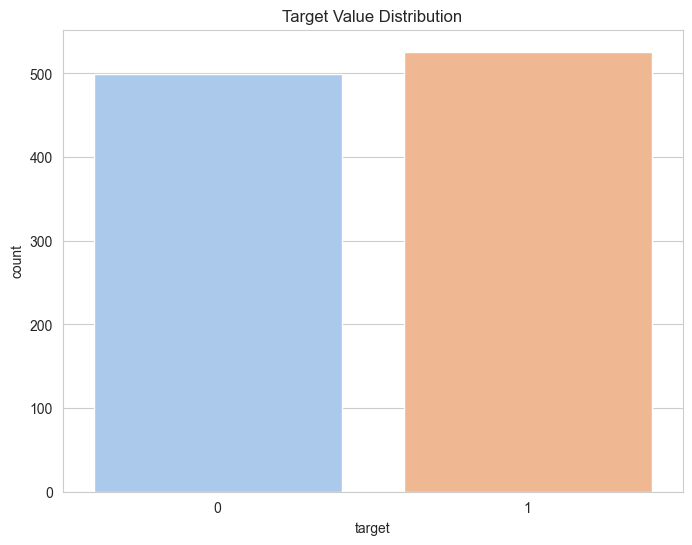

target
1    526
0    499
Name: count, dtype: int64


In [9]:
sns.set_style("whitegrid")

plt.figure(figsize=(8,6))
sns.countplot(x='target', data=df, palette='pastel')
plt.title('Target Value Distribution')
plt.show()

target_temp = df['target'].value_counts()
print(target_temp)

In [10]:
print(f"Percentage of patience without heart problems: {str(round(target_temp[0]*100/1025, 2))}")
print(f"Percentage of patience with heart problems: {str(round(target_temp[1]*100/1025, 2))}")

Percentage of patience without heart problems: 48.68
Percentage of patience with heart problems: 51.32


Next we'll analyse other features like 'sex', 'chest pain type (cp)', 'fasting blood sugar (fbs)', 'resting ecg', 'exercise induce angina (exang)', 'slope', 'number of major vessels (0-3) colored by flourosopy (ca)', and 'thal'

#### 4.2 Analysing the "Sex" Feature

In [11]:
df['sex'].unique()

array([1, 0], dtype=int64)

We notice that the 'sex' feature has 2 unique feature. 1 is for male and 0 is for female.

C:\Users\cW\AppData\Local\Temp\ipykernel_12564\4150123429.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='target', data=df, palette='pastel')


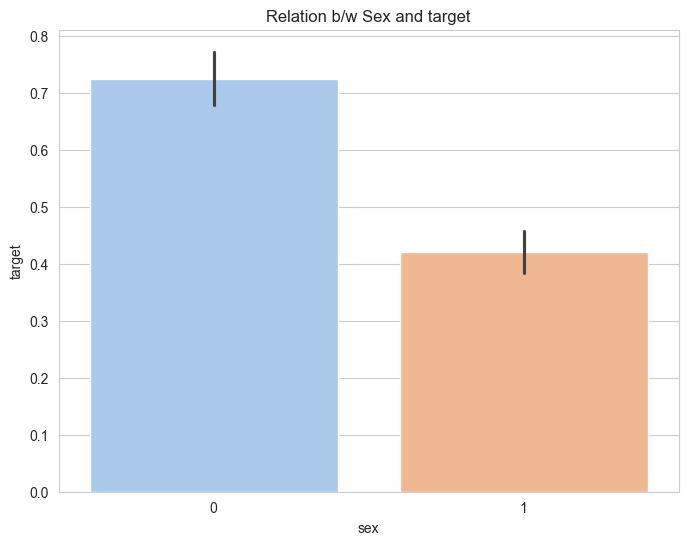

In [12]:
sns.set_style("whitegrid")

plt.figure(figsize=(8,6))
sns.barplot(x='sex', y='target', data=df, palette='pastel')
plt.title('Relation b/w Sex and target')
plt.show()

As we see, that female are more likely to have heart problem than males.

**Question Arises: Why it is that? Why women have more heart problem than female?**

#### 4.3 Analysing the 'Chest Pain Type (cp)' feature

In [13]:
df['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

Chest pain type feature vary from 0 to 3. The number 0 to 3 explain 1 is for **typical angina**, 2 is for **atypical angina**, 3 is for **non-anginal pain**, and 4 is for **asymptomatic**. 

0. Typical Angina: This type of chest pain is considered typical because it presents with classic symptoms that are highly indicative of heart problems. Typically, it manifests as a feeling of pressure, squeezing, or tightness in the chest that may spread to the arms, neck, jaw, or back. It often occurs with exertion or emotional stress and is relieved by rest or nitroglycerin. People experiencing typical angina are at high risk of having underlying coronary artery disease.

1. Atypical Angina: Atypical angina refers to chest pain that doesn't fit the classic description of typical angina. While it may still be related to heart issues, the symptoms are less specific and can vary widely among individuals. Atypical angina may present as discomfort or pain in the chest, but it might not be as severe or localized as typical angina. Additionally, it may not consistently respond to rest or nitroglycerin.

2. Non-Anginal Pain: This category includes chest discomfort or pain that is not related to coronary artery disease or angina. It could be caused by various factors such as musculoskeletal issues, gastrointestinal problems, anxiety, or respiratory conditions. Non-anginal pain may mimic angina in some cases but is typically not associated with the same underlying heart issues.

3. Asymptomatic: Asymptomatic means that there are no noticeable symptoms present. In the context of heart disease, it indicates that the individual is not experiencing any chest pain or related symptoms at the time of assessment. However, it's important to note that some people with heart disease may not experience noticeable symptoms, especially in the early stages or if they have other conditions masking the symptoms.

C:\Users\cW\AppData\Local\Temp\ipykernel_12564\2402928630.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cp', y='target', data=df, palette='pastel')


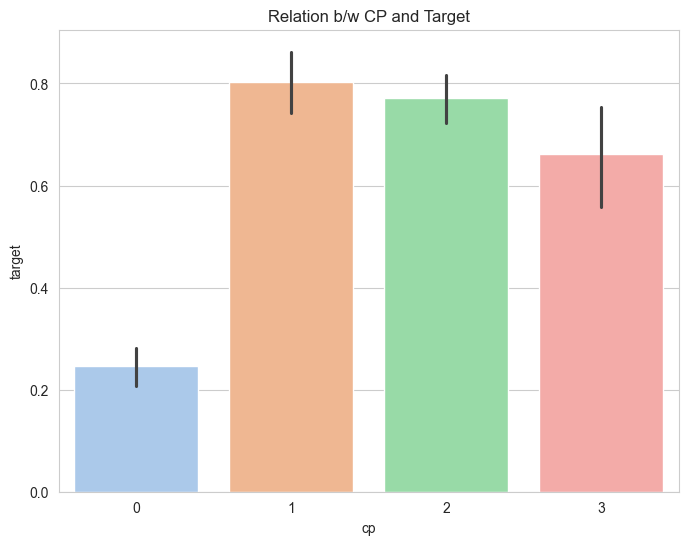

In [14]:
sns.set_style('whitegrid')

plt.figure(figsize=(8,6))
sns.barplot(x='cp', y='target', data=df, palette='pastel')
plt.title('Relation b/w CP and Target')
plt.show()

We notice, that chest pain of "0", i.e. the one with typical angine are much less likely to have heart problems.

#### 4.4 Analysing the Fasting Blood Sugar (FBS) feature

In [15]:
df['fbs'].unique()

array([0, 1], dtype=int64)

In [16]:
df['fbs'].describe()

count    1025.000000
mean        0.149268
std         0.356527
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fbs, dtype: float64

- Fasting Blood Sugar > 120 mg/dl = 1
- Fasting Blood Sugar < 120 mg/dl = 0

C:\Users\cW\AppData\Local\Temp\ipykernel_12564\4177147000.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fbs', y='target', data=df, palette='pastel')


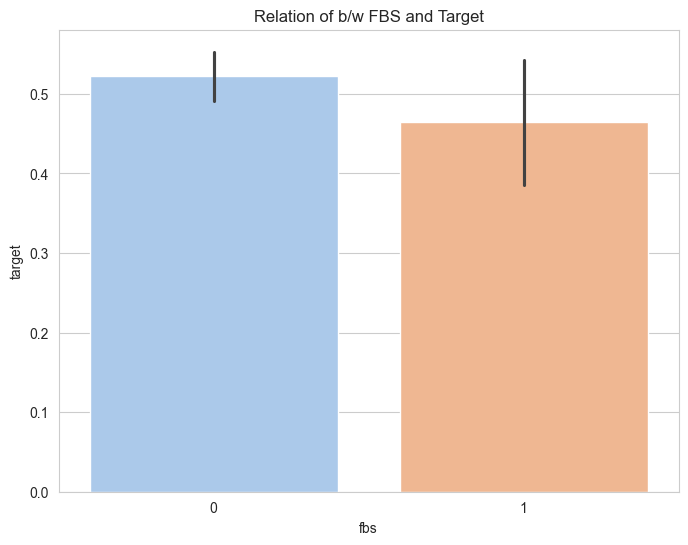

In [17]:
sns.set_style('whitegrid')

plt.figure(figsize=(8,6))
sns.barplot(x='fbs', y='target', data=df, palette='pastel')
plt.title('Relation of b/w FBS and Target')
plt.show()

Nothing Extraordinary Here!!!

#### 4.5 Analysing the Resting ECG feature

In [18]:
df['restecg'].unique()

array([1, 0, 2], dtype=int64)

C:\Users\cW\AppData\Local\Temp\ipykernel_12564\3182561243.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='restecg', y='target', data=df, palette='pastel')


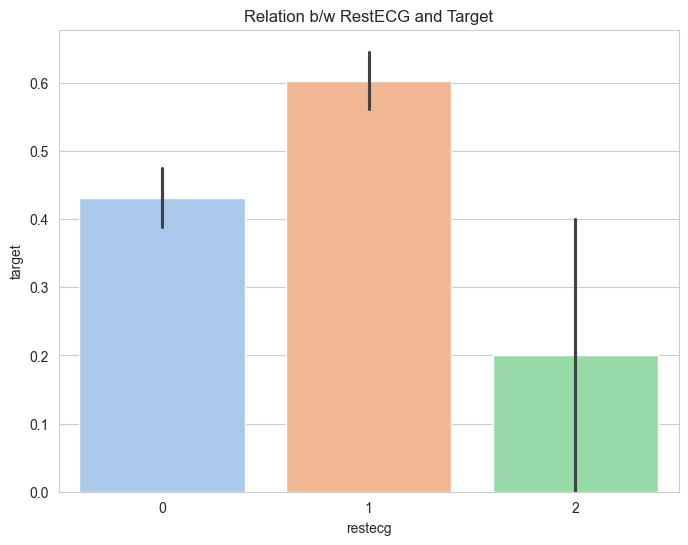

In [19]:
sns.set_style('whitegrid')

plt.figure(figsize=(8,6))
sns.barplot(x='restecg', y='target', data=df, palette='pastel')
plt.title('Relation b/w RestECG and Target')
plt.show()

We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'.

#### 4.6 Analysing the 'exang' feature

In [20]:
df['exang'].unique()

array([0, 1], dtype=int64)

C:\Users\cW\AppData\Local\Temp\ipykernel_12564\4087687645.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='exang', y='target', data=df, palette='pastel')


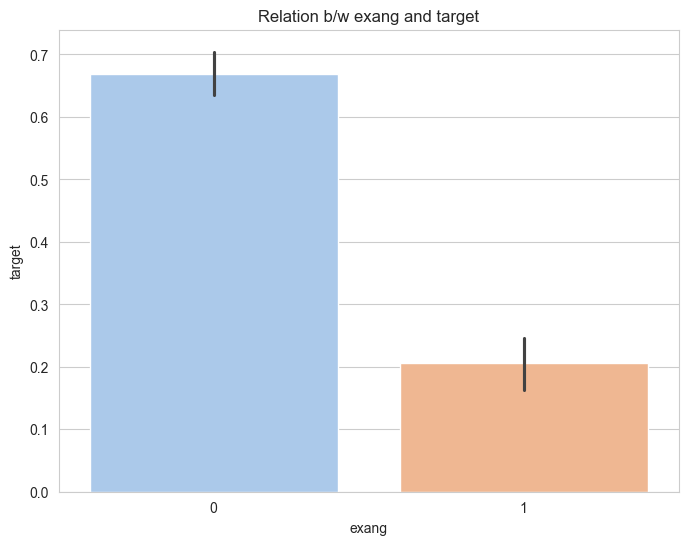

In [21]:
sns.set_style('whitegrid')

plt.figure(figsize=(8,6))
sns.barplot(x='exang', y='target', data=df, palette='pastel')
plt.title('Relation b/w exang and target')
plt.show()

exang: Exercise Induced Angina

People with exang = 1 i.e. Exercise induced angina are much less likely to have heart problems.

#### 4.7 Analysing the Slope Feature

In [22]:
df['slope'].unique()

array([2, 0, 1], dtype=int64)

C:\Users\cW\AppData\Local\Temp\ipykernel_12564\2198188775.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='slope', y='target', data=df, palette='pastel')


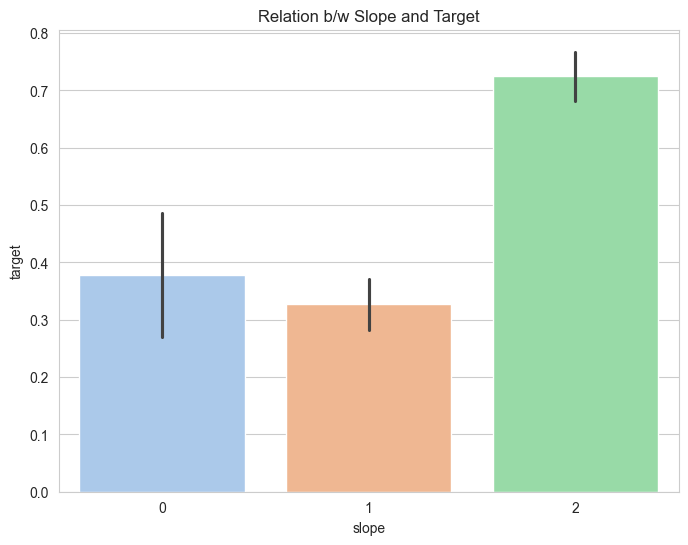

In [23]:
sns.set_style('whitegrid')

plt.figure(figsize=(8,6))
sns.barplot(x='slope', y='target', data=df, palette='pastel')
plt.title('Relation b/w Slope and Target')
plt.show()

We observe that Slope '2' cause heart pain much more than Slope '0' and '1'.

#### 4.8 Analysing the 'CA' Feature

In [24]:
df['ca'].unique()

array([2, 0, 1, 3, 4], dtype=int64)

ca: number of major vessels (0-3) colored by flouroscopy

C:\Users\cW\AppData\Local\Temp\ipykernel_12564\3763573975.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ca', data=df, palette='pastel')


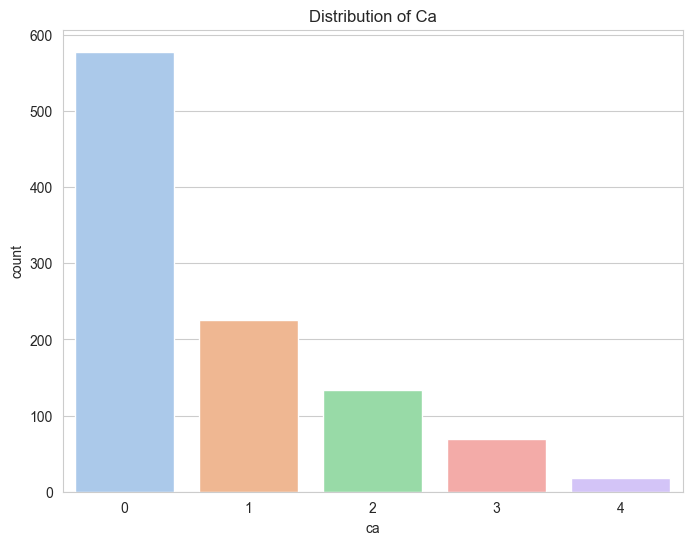

In [25]:
sns.set_style('whitegrid')

plt.figure(figsize=(8,6))
sns.countplot(x='ca', data=df, palette='pastel')
plt.title('Distribution of Ca')
plt.show()

C:\Users\cW\AppData\Local\Temp\ipykernel_12564\2887648028.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ca', y='target', data=df, palette='pastel')


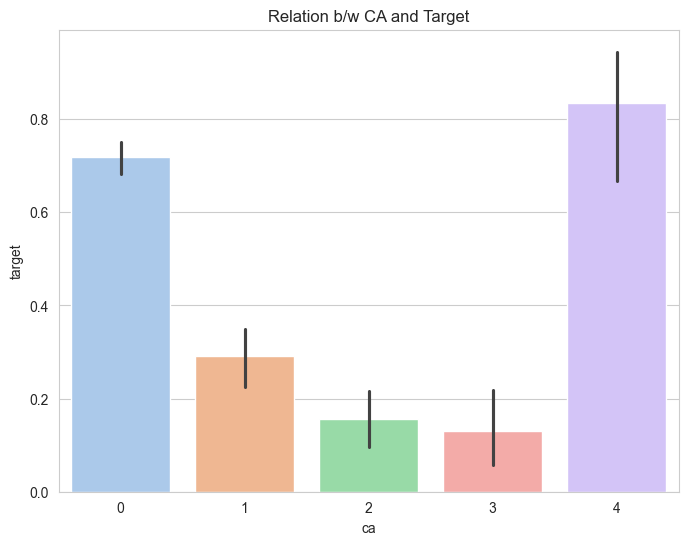

In [26]:
sns.set_style('whitegrid')

plt.figure(figsize=(8,6))
sns.barplot(x='ca', y='target', data=df, palette='pastel')
plt.title('Relation b/w CA and Target')
plt.show()

ca=4 has astonishingly large number of heart patients.

#### 4.9 Analysing the 'thal' Feature

In [27]:
df['thal'].unique()

array([3, 2, 1, 0], dtype=int64)

C:\Users\cW\AppData\Local\Temp\ipykernel_12564\3180693393.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='thal', y='target', data=df, palette='pastel')


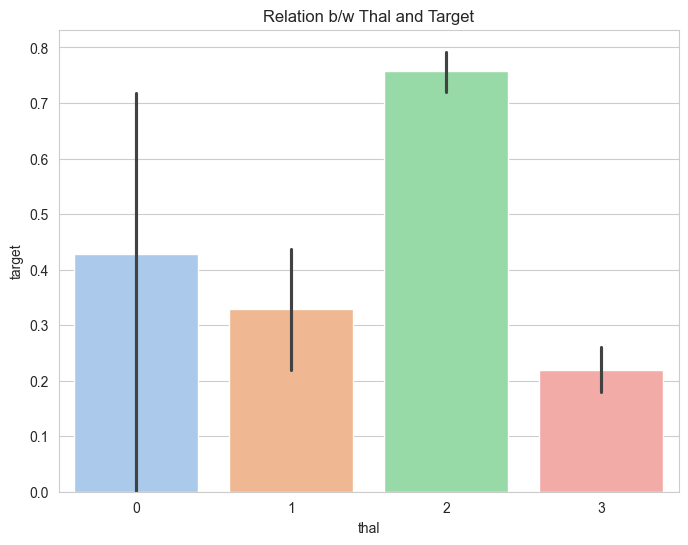

In [28]:
sns.set_style('whitegrid')

plt.figure(figsize=(8,6))
sns.barplot(x='thal', y='target', data=df, palette='pastel')
plt.title('Relation b/w Thal and Target')
plt.show()

C:\Users\cW\AppData\Local\Temp\ipykernel_12564\2700854422.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['thal'])


<Axes: ylabel='Density'>

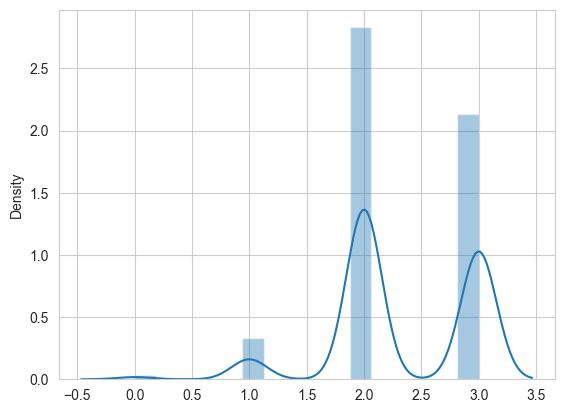

In [29]:
sns.distplot(x=df['thal'])

### 5. Data Modeling

#### 5.1 Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [31]:
print(f"X Train Shape: {X_train.shape}")
print(f"X Test Shape: {X_test.shape}")
print(f"Y Train Shape: {y_train.shape}")
print(f"Y Test Shape: {y_test.shape}")

X Train Shape: (820, 13)
X Test Shape: (205, 13)
Y Train Shape: (820,)
Y Test Shape: (205,)


#### 5.2 Logistic Regression

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [34]:
y_pred_lr.shape

(205,)

In [35]:
score_lr = round(accuracy_score(y_pred_lr, y_test)*100,2)
print(f"The accuracy score achieved using Logistic Regression is: {str(score_lr)} %")

The accuracy score achieved using Logistic Regression is: 86.34 %


#### 5.3 Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [37]:
y_pred_nb.shape

(205,)

In [38]:
score_nb = round(accuracy_score(y_pred_nb, y_test)*100,2)
print(f"The accuracy score achieved using Naive Bayes is: {str(score_nb)} %")

The accuracy score achieved using Naive Bayes is: 85.37 %


#### 5.4 SVM

In [39]:
from sklearn import svm

sv = svm.SVC(kernel='linear')
sv.fit(X_train, y_train)
y_pred_svm = sv.predict(X_test)

In [40]:
y_pred_svm.shape

(205,)

In [41]:
score_svm = round(accuracy_score(y_pred_svm, y_test)*100,2)
print(f"The accuracy score achieved using Linear SVM is: {str(score_svm)} %")

The accuracy score achieved using Linear SVM is: 83.9 %


#### 5.5 K Nearest Neighbors

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [43]:
y_pred_knn.shape

(205,)

In [44]:
score_knn = round(accuracy_score(y_pred_knn, y_test)*100,2)
print(f"The accuracy score achieved using KNN is: {str(score_knn)} %")

The accuracy score achieved using KNN is: 72.2 %


#### 5.6 Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

In [46]:
y_pred_dt.shape

(205,)

In [47]:
score_dt = round(accuracy_score(y_pred_dt, y_test)*100,2)
print(f"The accuracy score achieved using Decision Tree is: {str(score_dt)} %")

The accuracy score achieved using Decision Tree is: 100.0 %


#### 5.7 Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train)
    y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

In [49]:
y_pred_rf.shape

(205,)

In [50]:
score_rf = round(accuracy_score(y_pred_rf, y_test)*100,2)
print(f"The accuracy score achieved using Decision Tree is: {str(score_rf)} %")

The accuracy score achieved using Decision Tree is: 100.0 %


#### 5.8 XGBoost

In [51]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

In [52]:
y_pred_xgb.shape

(205,)

In [53]:
score_xgb = round(accuracy_score(y_pred_xgb, y_test)*100,2)
print(f'The accuracy score achieved using XGBoost is: {str(score_xgb)} %')

The accuracy score achieved using XGBoost is: 100.0 %


In [54]:
scores = [score_lr, score_nb, score_svm, score_knn, score_dt, score_rf, score_xgb]
algorithm = ['Logistic Regression', 'Naive Bayes', 'Support Vector Machine', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'XGBoost']

for i in range(len(algorithm)):
    print(f"The accuracy of score achieved using {algorithm[i]} is {str(scores[i])} %")

The accuracy of score achieved using Logistic Regression is 86.34 %
The accuracy of score achieved using Naive Bayes is 85.37 %
The accuracy of score achieved using Support Vector Machine is 83.9 %
The accuracy of score achieved using K-Nearest Neighbors is 72.2 %
The accuracy of score achieved using Decision Tree is 100.0 %
The accuracy of score achieved using Random Forest is 100.0 %
The accuracy of score achieved using XGBoost is 100.0 %


C:\Users\cW\AppData\Local\Temp\ipykernel_12564\3083751459.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=algorithm, y=scores, palette='pastel')


<Axes: xlabel='Algorithm', ylabel='Accuracy Score'>

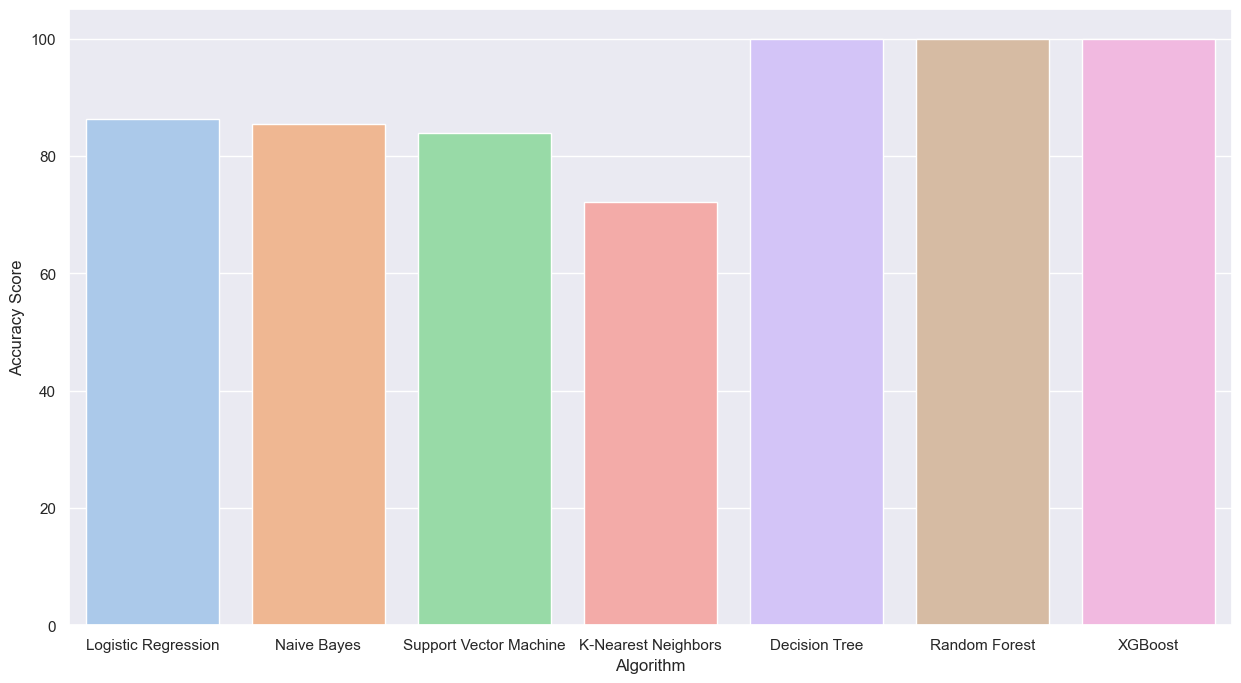

In [55]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithm")
plt.ylabel("Accuracy Score")

sns.barplot(x=algorithm, y=scores, palette='pastel')

### Predicted the Outcome

In [56]:
data = {'age': [45],'sex': [1],'cp':[2],'trestbps':[110],'chol':[287],'fbs':[1],'restecg':[0],'thalach':[163],'exang':[1],'oldpeak':[2.4],'slope':[2],'ca':[1],'thal':[1]}  # Assuming you want to predict for age 45
df_1 = pd.DataFrame(data)

# Use the predict method to predict the target variable
prediction = rf.predict(df_1)

print("Predicted outcome:", prediction)

Predicted outcome: [1]


fin.

In [57]:
import pickle

pickle.dump(rf, open("model_rf.pkl", "wb"))
print("Model Dump Successfull")

Model Dump Successfull
